In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
wsb_df = pd.read_csv(r'C:\Users\heena\Downloads\wsb.csv')
wsb_df.head(10) 


,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1
5,6,4377766,156,0
6,7,2798343,98,1
7,8,4303668,144,0
8,9,2958185,112,1
9,10,3623386,120,0


In [2]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 


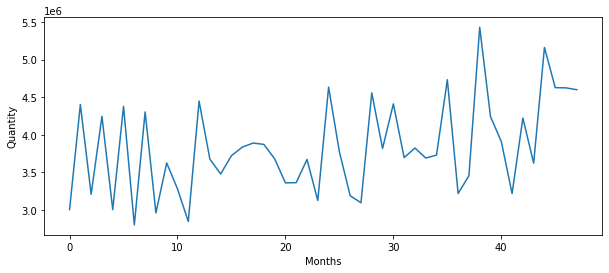

In [3]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb_df['Sale Quantity'] );


In [4]:
wsb_df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


In [5]:
#Forecasting using Moving Average
wsb_df['mavg_12'] = wsb_df['Sale Quantity'].rolling( window = 12 ).mean().shift(
1) 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
wsb_df[['Sale Quantity', 'mavg_12']][0:] 


,Sale Quantity,mavg_12
0,3002666,nan
1,4401553,nan
2,3205279,nan
3,4245349,nan
4,3001940,nan
5,4377766,nan
6,2798343,nan
7,4303668,nan
8,2958185,nan
9,3623386,nan


No handles with labels found to put in legend.


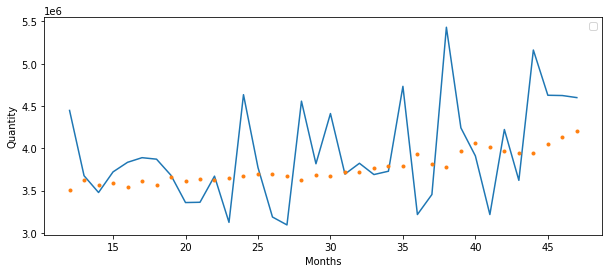

In [7]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb_df['Sale Quantity'][12:] );
plt.plot( wsb_df['mavg_12'][12:], '.' );
plt.legend(); 

In [8]:
# Forecast Accuracy
import numpy as np
def get_mape(actual, predicted):
 y_true, y_pred = np.array(actual), np.array(predicted)
 return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 ) 


In [9]:
get_mape( wsb_df['Sale Quantity'][36:].values,
wsb_df['mavg_12'][36:].values) 


14.04

In [10]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error( wsb_df['Sale Quantity'][36:].values,
wsb_df['mavg_12'][36:].values)) 


734725.8359239782

In [11]:
 # Exponential Smoothing
wsb_df['ewm'] = wsb_df['Sale Quantity'].ewm( alpha = 0.2 ).mean()
pd.options.display.float_format = '{:.2f}'.format
wsb_df[36:] 


,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm
36,37,3216483,121,1,3928410.33,3828234.64
37,38,3453239,128,0,3810280.00,3753219.93
38,39,5431651,170,0,3783643.33,4088961.93
39,40,4241851,160,0,3970688.42,4119543.81
40,41,3909887,151,1,4066369.08,4077607.99
41,42,3216438,120,1,4012412.75,3905359.34
42,43,4222005,152,0,3962369.58,3968692.78
43,44,3621034,125,0,3946629.42,3899157.24
44,45,5162201,170,0,3940489.50,4151776.99
45,46,4627177,160,0,4052117.17,4246860.31


In [12]:
get_mape( wsb_df[['Sale Quantity']][36:].values,
wsb_df[['ewm']][36:].values)


11.15

No handles with labels found to put in legend.


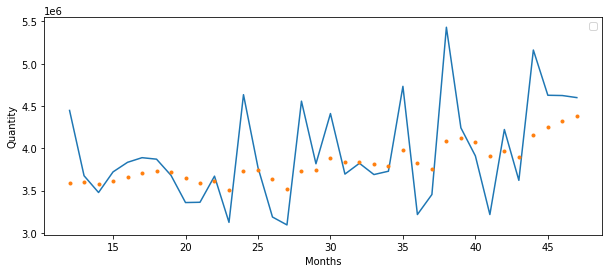

In [13]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb_df['Sale Quantity'][12:] );
plt.plot( wsb_df['ewm'][12:], '.' );
plt.legend(); 


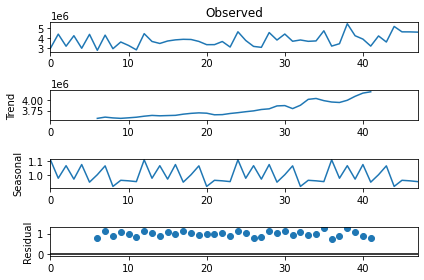

In [14]:
## Decomposing Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decompse = seasonal_decompose( np.array(wsb_df['Sale Quantity']),
model='multiplicative',
freq = 12 )
## Plotting the deocompsed time series components
ts_plot = ts_decompse.plot() 


In [15]:
wsb_df['seasonal'] = ts_decompse.seasonal
wsb_df['trend'] = ts_decompse.trend 
